In [1]:
library('tidyverse')
library('readxl')
library('ggrepel')
library('tidymodels')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflow

In [5]:
read_tsv('ihc_metrics.tsv')

Rows: 22 Columns: 14
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): sample, Region
dbl (12): CD3+ cells/mm^2, CD4+ cells/mm^2, CD8 + cells/mm^2, CD20 + cells/m...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sample,Region,CD3+ cells/mm^2,CD4+ cells/mm^2,CD8 + cells/mm^2,CD20 + cells/mm^2,MECA-79 + cells/mm^2,CD56 + cells/mm^2,FOXP-3 + cells/mm^2,CD68 + cells/mm^2,CD45 + cells/mm^2,iNOS + cells/mm^2,CD14 + cells/mm^2,CD206+ cells/mm^2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NMS22-13453,Peritumor,952.9977585,313.827000,712.247908,123.2549599,184.6268746,14.5441434,221.105703,589.670300,274.825424,83.605194,673.877000,NA
NMS22-28934,Peritumor,420.6761054,285.084700,350.952956,110.0001637,5.1859009,NA,65.762840,340.162600,496.916319,6.320453,108.809500,NA
NMS23-1947,Peritumor,466.1846505,NA,421.748043,137.2563720,3.8023555,NA,51.463980,541.901100,335.880140,30.511597,75.079500,NA
NMS23-471,Peritumor,272.5492577,NA,175.629417,92.7089409,2.5850000,2.7071966,12.893450,488.302700,439.109870,143.381539,468.835100,NA
S08-25548,Peritumor,396.0248732,304.726900,267.628257,238.3899022,8.7310000,0.9622271,42.765960,565.409700,855.746361,327.543532,496.074900,1157.302945
S10-479,Peritumor,450.0897609,309.443200,252.431179,319.4899951,65.0670000,NA,68.640570,471.125500,946.990686,119.120235,344.088300,646.908727
S14-11208,Peritumor,116.1195125,141.502700,60.682025,14.9466972,3.0408964,0.0000000,35.035050,361.066500,132.796271,12.411696,162.148500,504.600286
S14-9996,Peritumor,121.9678924,32.804300,242.164214,54.7116806,8.0827064,2.2814556,667.030200,520.151800,756.298153,10.590477,98.229470,NA
S15-16380,Peritumor,131.0586625,97.977270,212.185362,9.5489168,0.9330295,NA,29.215550,254.301000,312.264788,100.923184,143.697800,NA


In [39]:
cd8_metrics <-
    read_tsv('ihc_metrics.tsv') %>%
    pivot_longer(
        names_to='metric',
        values_to='estimate',
        -c(`sample`, `Region`)
    ) %>%
    filter(`metric` == 'CD8 + cells/mm^2') %>%
    pivot_wider(
        names_from=`Region`,
        values_from=`estimate`,
        id_cols=c(`sample`, `metric`)
    ) %>%
    mutate(
        `peritumor_to_tumor`=`Peritumor`/`Tumor`,
        `log_p2t`=log10(`peritumor_to_tumor`),
        
        `tumor_to_peritumor`=`Tumor`/`Peritumor`,
        `log_t2p`=log10(`tumor_to_peritumor`)
    )

cd8_metrics

Rows: 22 Columns: 14
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): sample, Region
dbl (12): CD3+ cells/mm^2, CD4+ cells/mm^2, CD8 + cells/mm^2, CD20 + cells/m...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sample,metric,Peritumor,Tumor,peritumor_to_tumor,log_p2t,tumor_to_peritumor,log_t2p
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NMS22-13453,CD8 + cells/mm^2,712.24791,6.893953,103.314877,2.0141629,0.009679148,-2.0141629
NMS22-28934,CD8 + cells/mm^2,350.95296,14.253560,24.622126,1.3913256,0.040613876,-1.3913256
NMS23-1947,CD8 + cells/mm^2,421.74804,7.917781,53.265939,1.7264496,0.018773723,-1.7264496
NMS23-471,CD8 + cells/mm^2,175.62942,1.067216,164.567826,2.2163449,0.006076522,-2.2163449
S08-25548,CD8 + cells/mm^2,267.62826,5.969429,44.833142,1.6515992,0.022304928,-1.6515992
S10-479,CD8 + cells/mm^2,252.43118,5.485660,46.016556,1.6629141,0.021731309,-1.6629141
S14-11208,CD8 + cells/mm^2,60.68202,1.120618,54.150500,1.7336025,0.018467050,-1.7336025
S14-9996,CD8 + cells/mm^2,242.16421,9.768121,24.791279,1.3942989,0.040336765,-1.3942989
S15-16380,CD8 + cells/mm^2,212.18536,25.576010,8.296265,0.9188826,0.120536166,-0.9188826


In [40]:
q3_norm_tbl_wide <-
    read_xlsx('Chondrosarcoma Nanostring 12082023.xlsx', sheet='Chondrosarcoma Nanostring') %>%
    filter(!is.na(`Probe Name`)) %>%
    mutate(across(starts_with('2023'), parse_double))

q3_norm_tbl_wide %>%
    head()

Probe Name,Annotation,Accession #,NS Probe ID,Class Name,Analyte Type,Species Name,Target Sequence,% Samples above Threshold,Comments,⋯,20231011_30102816220624-01_NMS23-1947_11.RCC,20231011_30102816220624-01_NMS23-471_10.RCC,20231011_30102816220624-01_S08-25548_01.RCC,20231011_30102816220624-01_S10-479_02.RCC,20231011_30102816220624-01_S14-11208_04.RCC,20231011_30102816220624-01_S14-9996_03.RCC,20231011_30102816220624-01_S15-16380_05.RCC,20231011_30102816220624-01_S17-4703_06.RCC,20231011_30102816220624-01_S18-6943_07.RCC,20231011_30102816220624-01_Standard_12.RCC
<chr>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2M,NA,NM_000014.4,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,20964.50,10562.54,9032.59,12600.21,2929.25,7203.07,13218.09,15516.11,10711.54,1529.53
ACVR1C,NA,NM_145259.2,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,48.90,33.14,26.67,124.59,26.86,25.87,96.15,19.46,171.47,1175.21
ADAM12,NA,NM_003474.5,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,581.87,1505.33,1179.69,622.95,1203.00,1298.10,1078.38,990.61,367.95,736.13
ADGRE1,NA,NM_001256252.1,NA,Endogenous,mRNA,NA,NA,91.67,NA,⋯,29.34,7.21,23.04,191.04,8.18,32.92,9.83,20.39,25.01,900.30
ADM,NA,NM_001124.2,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,581.87,123.08,1876.84,1254.21,148.33,670.22,274.24,109.35,317.93,377.99
ADORA2A,NA,NM_000675.5,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,61.12,69.43,95.78,215.96,45.55,61.14,54.63,56.53,87.52,766.67


In [41]:
q3_norm_tbl <-
    q3_norm_tbl_wide %>%
    pivot_longer(
        names_to='sample',
        values_to='norm_exp',
        starts_with('2023')
    ) %>%
    mutate(
        `sample`=
            `sample` %>%
            str_replace_all('20231011_30102816220624-01_', '') %>%
            str_replace_all('\\.RCC', '')
    ) %>%
    select(`gene_symbol`=`Probe Name`, `sample`, `norm_exp`) %>%
    filter(
        `sample` != 'Standard_12',
        !str_detect(`gene_symbol`, 'POS_'),
        !str_detect(`gene_symbol`, 'NEG_')
    ) %>%
    mutate(
        `sample`=str_replace_all(`sample`, '_.*', ''),
        `norm_exp`=log10(`norm_exp` + 1)
    ) %>%
    left_join(`cd8_metrics`, by='sample')
    

q3_norm_tbl %>%
    head()

gene_symbol,sample,norm_exp,metric,Peritumor,Tumor,peritumor_to_tumor,log_p2t,tumor_to_peritumor,log_t2p
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2M,NMS22-13453,4.278656,CD8 + cells/mm^2,712.2479,6.893953,103.31488,2.014163,0.009679148,-2.014163
A2M,NMS22-28934,4.511058,CD8 + cells/mm^2,350.9530,14.253560,24.62213,1.391326,0.040613876,-1.391326
A2M,NMS23-1947,4.321505,CD8 + cells/mm^2,421.7480,7.917781,53.26594,1.726450,0.018773723,-1.726450
A2M,NMS23-471,4.023809,CD8 + cells/mm^2,175.6294,1.067216,164.56783,2.216345,0.006076522,-2.216345
A2M,S08-25548,3.955860,CD8 + cells/mm^2,267.6283,5.969429,44.83314,1.651599,0.022304928,-1.651599
A2M,S10-479,4.100412,CD8 + cells/mm^2,252.4312,5.485660,46.01656,1.662914,0.021731309,-1.662914


In [42]:
q3_norm_tbl %>%
    filter(`gene_symbol` == 'MAGEC1')

gene_symbol,sample,norm_exp,metric,Peritumor,Tumor,peritumor_to_tumor,log_p2t,tumor_to_peritumor,log_t2p
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MAGEC1,NMS22-13453,0.9489018,CD8 + cells/mm^2,712.24791,6.893953,103.314877,2.0141629,0.009679148,-2.0141629
MAGEC1,NMS22-28934,1.2902573,CD8 + cells/mm^2,350.95296,14.253560,24.622126,1.3913256,0.040613876,-1.3913256
MAGEC1,NMS23-1947,0.8715729,CD8 + cells/mm^2,421.74804,7.917781,53.265939,1.7264496,0.018773723,-1.7264496
MAGEC1,NMS23-471,0.9143432,CD8 + cells/mm^2,175.62942,1.067216,164.567826,2.2163449,0.006076522,-2.2163449
MAGEC1,S08-25548,1.1565492,CD8 + cells/mm^2,267.62826,5.969429,44.833142,1.6515992,0.022304928,-1.6515992
MAGEC1,S10-479,1.1017471,CD8 + cells/mm^2,252.43118,5.485660,46.016556,1.6629141,0.021731309,-1.6629141
MAGEC1,S14-11208,1.0145205,CD8 + cells/mm^2,60.68202,1.120618,54.150500,1.7336025,0.018467050,-1.7336025
MAGEC1,S14-9996,0.9666110,CD8 + cells/mm^2,242.16421,9.768121,24.791279,1.3942989,0.040336765,-1.3942989
MAGEC1,S15-16380,2.0988167,CD8 + cells/mm^2,212.18536,25.576010,8.296265,0.9188826,0.120536166,-0.9188826


In [43]:
q3_norm_tbl %>%
    filter(`gene_symbol` == 'MAGEC1') %>%
    write_csv('magec1-vs-cd8_metrics.csv')

In [44]:
res_tbl <-
    q3_norm_tbl %>%
    group_by(`gene_symbol`) %>%
    group_split() %>%
    map_df(function(x) {
        one_gene <- x %>% distinct(`gene_symbol`) %>% pull()
        
        cor.test(x$`norm_exp`, x$`log_t2p`, method='pearson', na.rm=TRUE) %>%
            tidy() %>%
            mutate(
                `gene_symbol`=one_gene
            )
    }) %>%
    arrange(`p.value`) %>%
    mutate(
        `mlog10p`=-log10(`p.value`),
        `fdr`=p.adjust(`p.value`, method='fdr')
    ) %>%
    relocate(`gene_symbol`, `estimate`, `p.value`, `fdr`)

res_tbl

gene_symbol,estimate,p.value,fdr,statistic,parameter,conf.low,conf.high,method,alternative,mlog10p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
MAGEC1,0.8005372,0.003075563,0.9829747,4.007474,9,0.386053804,0.946082384,Pearson's product-moment correlation,two.sided,2.512075
IFIT2,-0.7938010,0.003534324,0.9829747,-3.915638,9,-0.944108928,-0.370215978,Pearson's product-moment correlation,two.sided,2.451694
CDH11,-0.7636990,0.006226244,0.9829747,-3.548938,9,-0.935156444,-0.302327377,Pearson's product-moment correlation,two.sided,2.205774
TRIM21,-0.7445836,0.008573883,0.9829747,-3.346296,9,-0.929355408,-0.261516940,Pearson's product-moment correlation,two.sided,2.066822
IGF2R,0.7044915,0.015501563,0.9829747,2.977930,9,0.181187537,0.916884730,Pearson's product-moment correlation,two.sided,1.809625
MAGEC2,0.6931339,0.018035912,0.9829747,2.884817,9,0.159633426,0.913274930,Pearson's product-moment correlation,two.sided,1.743862
HMGA1,0.6849548,0.020035628,0.9829747,2.820348,9,0.144420305,0.910653787,Pearson's product-moment correlation,two.sided,1.698197
CASP1,-0.6751856,0.022625596,0.9829747,-2.745967,9,-0.907499034,-0.126578172,Pearson's product-moment correlation,two.sided,1.645400
F2RL1,-0.6721034,0.023489838,0.9829747,-2.723060,9,-0.906498224,-0.121021602,Pearson's product-moment correlation,two.sided,1.629120


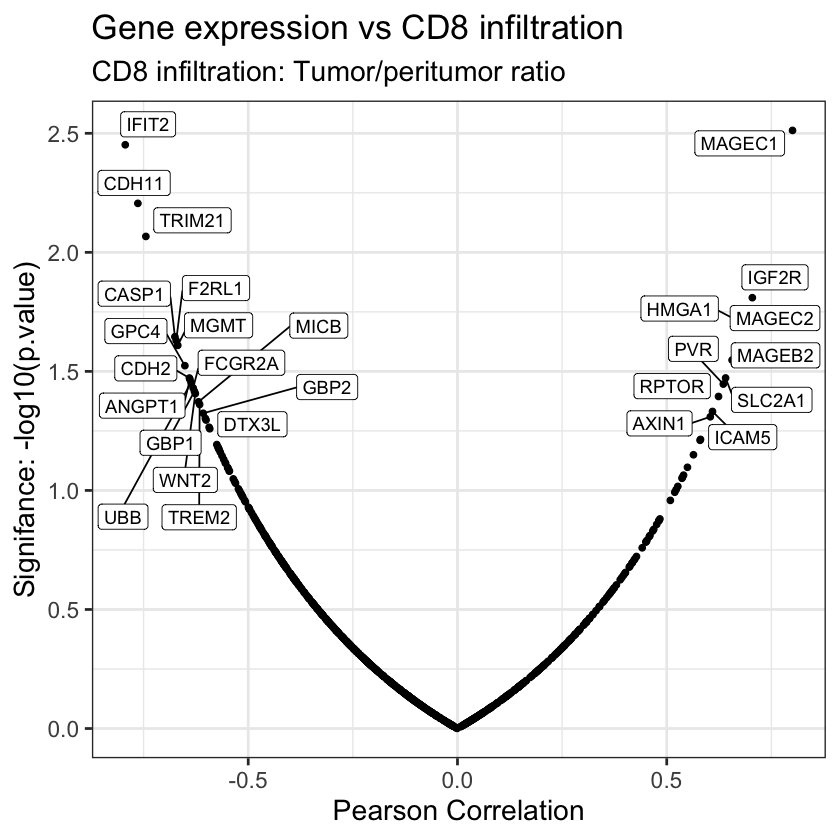

In [45]:
res_tbl %>%
    mutate(`label`=case_when(
        `mlog10p` > 1.3 ~ `gene_symbol`,
        TRUE ~ ''
    )) %>%
    ggplot(aes(x=`estimate`, y=`mlog10p`)) +
        geom_point() +
        geom_label_repel(aes(label=`label`), max.overlaps=Inf) +
        theme_bw(base_size=17) +
        labs(
            title='Gene expression vs CD8 infiltration',
            subtitle='CD8 infiltration: Tumor/peritumor ratio',
            x='Pearson Correlation',
            y='Signifance: -log10(p.value)'
        )

In [46]:
res_tbl %>%
    write_csv('correlation-log_vs_log-t2pcd8_vs_geneexp.csv')

In [48]:
res_tbl %>%
    filter(`estimate` < 0) %>%
    head(50) %>%
    pull(`gene_symbol`) %>%
    paste(collapse=', ')

[1] "IFIT2, CDH11, TRIM21, CASP1, F2RL1, MGMT, GPC4, CDH2, ANGPT1, UBB, FCGR2A, GBP1, WNT2, MICB, TREM2, GBP2, DTX3L, HLA-DPB1, HDAC3, PARP9, SOCS1, DKK1, IL11RA, OAZ1, IFIH1, CSF1R, OAS1, KLRK1, WNT4, MAP3K5, NOD2, CD45RO, PDZK1IP1, WNT10A, IRF8, MB21D1, SFXN1, PLA1A, RAD51, NFKBIE, FLNB, TNFSF13B, FCGR1A, TLR7, CTNNB1, TMEM173, THBS1, TNFRSF11A, TNFRSF9, IL4"

In [47]:
res_tbl %>%
    filter(`estimate` > 0) %>%
    head(50) %>%
    pull(`gene_symbol`) %>%
    paste(collapse=', ')

[1] "MAGEC1, IGF2R, MAGEC2, HMGA1, MAGEB2, SLC2A1, PVR, RPTOR, ICAM5, AXIN1, VEGFA, VEGFB, ULBP2, STC1, HK2, PTGS2, CENPF, MET, PSMB5, HDAC4, STK11IP, PFKFB3, MAGEA12, HDAC5, PFKM, FOSL1, WNT5A, H2AFX, CD8A, RELA, TNFRSF4, DNAJC14, MAGEA3/A6, NF1, PTPN11, ERO1A, TLK2, ERCC3, FUT4, MAP3K12, GLS, IRF3, FZD8, MXI1, CCL21, VHL, PRKCA, NECTIN1, BNIP3, ARID1A"